# MOVIE LENS DATA ANALYSIS

This is a report on the movieLens dataset available here. MovieLens itself is a research site run by GroupLens Research group at the University of Minnesota. The first automated recommender system was developed there in 1993.
<br><br>The MovieLens datasets are widely used in education, research, and industry. They are downloaded hundreds of thousands of times each year, reflecting their use in popular press programming books, traditional and online courses, and software. These datasets are a product of member activity in the MovieLens movie recommendation system, an active research platform that has hosted many experiments since its launch in 1997. This article documents the history of MovieLens and the MovieLens datasets. We include a discussion of lessons learned from running a long-standing, live research platform from the perspective of a research organization. We document best practices and limitations of using the MovieLens datasets in new research.


## OBJECTIVE

The movieLens dataset is most often used for the purpose of recommender systems which aim to predict user movie ratings based on other users’ ratings. In other words we expect that users with similar taste will tend to rate movies with high correlation.<br>
However, in this analysis we will try to explore the movies themselves. Hopefully it will give us an interesting insight into the history of cinematography.<br>
We will also do some predictions like, Predicting number of ratings a movie might get in fututre and Predicting average rating for movie in future.

<br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br>

### 1.Import Libaries

In [1]:
import pandas as pd # pandas is a data manipulation library
import numpy as np #provides numerical arrays and functions to manipulate the arrays efficiently
import random
import matplotlib.pyplot as plt # data visualization library
from wordcloud import WordCloud, STOPWORDS #used to generate world cloud
from pandas import DataFrame as df

***Description of libraries***<br><br>
**i. pandas**<br>
pandas is a Python package providing fast, flexible, and expressive data structures designed to make working with “relational” or “labeled” data both easy and intuitive. It aims to be the fundamental high-level building block for doing practical, real world data analysis in Python.<br>pandas is well suited for many different kinds of data:<br>
--Tabular data with heterogeneously-typed columns, as in an SQL table or Excel spreadsheet
--Ordered and unordered (not necessarily fixed-frequency) time series data.
--The two primary data structures of pandas, Series (1-dimensional) and DataFrame (2-dimensional), handle the vast majority of typical use cases in finance, statistics, social science, and many areas of engineering
<br><br>
**ii. numpy**<br>
NumPy is the fundamental package for scientific computing with Python.<br>It contains among other things:<br>
--a powerful N-dimensional array object
--sophisticated (broadcasting) functions
--tools for integrating C/C++ and Fortran code
--useful linear algebra, Fourier transform, and random number capabilities
<br><br>
**iii. Matplotlib**<br>
Matplotlib is a Python 2D plotting library which produces publication quality figures in a variety of hardcopy formats and interactive environments across platforms.
Matplotlib tries to make easy things easy and hard things possible. we can generate plots, histograms, power spectra, bar charts, errorcharts, scatterplots, etc., with just a few lines of code.
<br><br>
**iv. Wordcloud**<br>
Word Cloud is a data visualization technique used for representing text data in which the size of each word indicates its frequency or importance. Significant textual data points can be highlighted using a word cloud. Word clouds are widely used for analyzing data from social network websites.
We can do this easily by importin wordcloud library
<br><br>
**v. scipy**<br>
SciPy  is a free and open-source Python library used for scientific computing and technical computing.
SciPy contains modules for optimization, linear algebra, integration, interpolation, special functions, FFT, signal and image processing, ODE solvers and other tasks common in science and engineering.
<br><br>
**vi. sklearn**<br>
Scikit-learn (formerly scikits.learn) is a free software machine learning library for the Python programming language.[3] It features various classification, regression and clustering algorithms including support vector machines, random forests, gradient boosting, k-means and DBSCAN, and is designed to interoperate with the Python numerical and scientific libraries NumPy and SciPy.
<br><br>
<br>

### 2.Reading and Exploring the Data

We have 2 datasets.
movies, ratings
Both of which are in csv format.

We first import movies dataset.

In [2]:
#importing movies.csv
movies_df= pd.read_csv('movies.csv')

read_csv() function of Pandas library allows us to read CSV (comma-separated) file into DataFrame

In [3]:
#dimensionality of movies df
movies_df.shape

(27278, 3)

shape() function represents the dimensionality of the DataFrame.

In [4]:
#top 5 rows of movies_df
movies_df.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


head() function returns the first n rows for the object based on position. It is useful for quickly testing if your object has the right type of data in it.
By default value of n is 5, it can be changed (ex: df.head(10))

In [5]:
#a concise summary of 
movies_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27278 entries, 0 to 27277
Data columns (total 3 columns):
movieId    27278 non-null int64
title      27278 non-null object
genres     27278 non-null object
dtypes: int64(1), object(2)
memory usage: 639.4+ KB


info() function prints a concise summary of a DataFrame.
This method prints information about a DataFrame including the index dtype and column dtypes, non-null values and memory usage.

In [6]:
len(movies_df.index)

27278

len() function returns the number of rows.

Now lets input ratings dataset, and view its summary.

In [7]:
# lets explore ratings.CSV
ratings_df=pd.read_csv('ratings.csv',sep=',')

In [8]:
ratings_df.shape

(1048575, 4)

In [9]:
ratings_df.head()

,userId,movieId,rating,timestamp
0,1,2,3.5,1112486027
1,1,29,3.5,1112484676
2,1,32,3.5,1112484819
3,1,47,3.5,1112484727
4,1,50,3.5,1112484580


In [10]:
#summary of ratings.csv
ratings_df.describe()

,userId,movieId,rating,timestamp
count,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06
mean,3.527086e+03,8.648988e+03,3.529272e+00,1.096036e+09
std,2.018424e+03,1.910014e+04,1.051919e+00,1.594899e+08
min,1.000000e+00,1.000000e+00,5.000000e-01,8.254999e+08
25%,1.813000e+03,9.030000e+02,3.000000e+00,9.658382e+08
50%,3.540000e+03,2.143000e+03,4.000000e+00,1.099263e+09
75%,5.233000e+03,4.641000e+03,4.000000e+00,1.217407e+09
max,7.120000e+03,1.306420e+05,5.000000e+00,1.427764e+09


describe() function generates descriptive statistics that summarize the central tendency, dispersion and shape of a dataset’s distribution, excluding NaN values.

Analyzes both numeric and object series, as well as DataFrame column sets of mixed data types. The output will vary depending on what is provided. 

In [11]:
ratings_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 4 columns):
userId       1048575 non-null int64
movieId      1048575 non-null int64
rating       1048575 non-null float64
timestamp    1048575 non-null int64
dtypes: float64(1), int64(3)
memory usage: 32.0 MB


<br><br><br><br><br><br><br><br><br><br><br><br><br><br>

### 3.Cleaning of data

In this step we check if our datasets have any null values.

we do not want any null values in our dataset because the result of arithmetic with NaN will be another NaN.

In [12]:
#is any row null
movies_df.isnull().any()

movieId    False
title      False
genres     False
dtype: bool

isnull() function Detect missing values (NaN in numeric arrays, None/NaN in object arrays)

In [13]:
#is any row null there
ratings_df.isnull().any()

userId       False
movieId      False
rating       False
timestamp    False
dtype: bool

<br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br>

### 4.Data Analysis

In [14]:
#spliting genres
movies_df['genres_arr'] = movies_df['genres'].str.split('|')
movies_df.head()

,movieId,title,genres,genres_arr
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,"[Adventure, Animation, Children, Comedy, Fantasy]"
1,2,Jumanji (1995),Adventure|Children|Fantasy,"[Adventure, Children, Fantasy]"
2,3,Grumpier Old Men (1995),Comedy|Romance,"[Comedy, Romance]"
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,"[Comedy, Drama, Romance]"
4,5,Father of the Bride Part II (1995),Comedy,[Comedy]


split('[delimiter]') function splits strings around given separator/delimiter.

In [15]:
del movies_df['genres']

'del'  keyword short for delete, deletes an entire column in a dataframe

In [16]:
movies_df.head()

,movieId,title,genres_arr
0,1,Toy Story (1995),"[Adventure, Animation, Children, Comedy, Fantasy]"
1,2,Jumanji (1995),"[Adventure, Children, Fantasy]"
2,3,Grumpier Old Men (1995),"[Comedy, Romance]"
3,4,Waiting to Exhale (1995),"[Comedy, Drama, Romance]"
4,5,Father of the Bride Part II (1995),[Comedy]


In [17]:
#count how many genres a movie have
counter_lambda = lambda x: len(x)
movies_df['genre_count'] = movies_df.genres_arr.apply(counter_lambda)
movies_df.head()

,movieId,title,genres_arr,genre_count
0,1,Toy Story (1995),"[Adventure, Animation, Children, Comedy, Fantasy]",5
1,2,Jumanji (1995),"[Adventure, Children, Fantasy]",3
2,3,Grumpier Old Men (1995),"[Comedy, Romance]",2
3,4,Waiting to Exhale (1995),"[Comedy, Drama, Romance]",3
4,5,Father of the Bride Part II (1995),[Comedy],1


The lambda operator or lambda function is a way to create small anonymous functions, i.e. functions without a name. These functions are throw-away functions, i.e. they are just needed where they have been created.

apply() function applies function along input axis of DataFrame.

In [18]:
#slicing out columns to display only title and genres columns from movies.csv
movies_df[['title','genres_arr']].head()

,title,genres_arr
0,Toy Story (1995),"[Adventure, Animation, Children, Comedy, Fantasy]"
1,Jumanji (1995),"[Adventure, Children, Fantasy]"
2,Grumpier Old Men (1995),"[Comedy, Romance]"
3,Waiting to Exhale (1995),"[Comedy, Drama, Romance]"
4,Father of the Bride Part II (1995),[Comedy]


In [19]:
#count how many movies are of Genre of Animation
animation_df = movies_df[movies_df.genres_arr.map(lambda x: 'Animation' in x)]
print (len(animation_df.index))

1027


<br><br><br><br><br><br><br>

In [20]:
from collections import Counter

flattened_genres = [item for sublist in movies_df.genres_arr for item in sublist]
genre_dict = dict(Counter(flattened_genres))

A Counter is a container that keeps track of how many times equivalent values are added. It can be used to implement the same algorithms for which bag or multiset data structures are commonly used in other languages.

Once a Counter is populated, its values can be retrieved using the dictionary API.

The dict() function creates a dictionary.
Python's efficient key/value hash table structure is called a dictionary or dict. 

In [21]:
import pprint
pprint.pprint (genre_dict)

{'(no genres listed)': 246,
 'Action': 3520,
 'Adventure': 2329,
 'Animation': 1027,
 'Children': 1139,
 'Comedy': 8374,
 'Crime': 2939,
 'Documentary': 2471,
 'Drama': 13344,
 'Fantasy': 1412,
 'Film-Noir': 330,
 'Horror': 2611,
 'IMAX': 196,
 'Musical': 1036,
 'Mystery': 1514,
 'Romance': 4127,
 'Sci-Fi': 1743,
 'Thriller': 4178,
 'War': 1194,
 'Western': 676}


***What is the most minimum rating given to any movie?***

In [22]:
min_rate=ratings_df['rating'].min()
min_rate

0.5

min() is a built-in function in Python 3. It returns the smallest item in an iterable or the smallest of two or more arguments.

*** Which movies have the min rating of 0.5?***

In [23]:
min_rate_df=ratings_df.loc[ratings_df['rating'] == min_rate]
min_rate_df.head(3)

,userId,movieId,rating,timestamp
982,11,286,0.5,1230787831
1020,11,671,0.5,1230782626
1038,11,1077,0.5,1230782602


df.loc access a group of rows and columns by label(s) or a boolean array.

***What is the maximum rating given to any movie?***

In [24]:
max_rate=ratings_df['rating'].max()
max_rate

5.0

max() is a built-in function in Python 3. It returns the largest item in an iterable or the smallest of two or more arguments.

*** Which movies have the max rating of 5.0?***

In [25]:
max_rate_df=ratings_df.loc[ratings_df['rating'] == max_rate]
max_rate_df.head(3)

,userId,movieId,rating,timestamp
131,1,4993,5.0,1112484682
142,1,5952,5.0,1112484619
158,1,7153,5.0,1112484633


***What is average rating for any movie?***

In [26]:
np.mean(ratings_df.rating)

3.5292716305462175

mean() function of Numpy library Computes the arithmetic mean along the specified axis.

In [27]:
np.median(ratings_df.rating)

4.0

median() function of Numpy library Computes the median along the specified axis

***lets see what are the 30% of ratings ***

In [28]:
np.percentile(ratings_df.rating, 30)

3.0

percentile() function of Numpy library Computes the qth percentile of the data along the specified axis.

***lets find the most common rating given by users to movies ***

In [29]:
from scipy import stats
stats.mode(ratings_df.rating)

ModeResult(mode=array([ 4.]), count=array([295135]))

scipy.stats.mode() function returns an array of the modal (most common) value in the passed array.

***We will merge the two datasets movies and rating***

In [30]:
#merging two dataframes "movies.csv" and "ratings.csv"
movie_df_ratings_df=movies_df.merge(ratings_df,on = 'movieId',how = 'inner')
movie_df_ratings_df.head(3)

,movieId,title,genres_arr,genre_count,userId,rating,timestamp
0,1,Toy Story (1995),"[Adventure, Animation, Children, Comedy, Fantasy]",5,3,4.0,944919407
1,1,Toy Story (1995),"[Adventure, Animation, Children, Comedy, Fantasy]",5,6,5.0,858275452
2,1,Toy Story (1995),"[Adventure, Animation, Children, Comedy, Fantasy]",5,8,4.0,833981871


merge() of pandas Merge DataFrame objects by performing a database-style join operation by columns or indexes.

In [31]:
len(movie_df_ratings_df)

1048575

***now lets find the titles of the top 10 movies to see if we are missing on some awesome movies!***

In [32]:
# now lets find the titles of the top 10 movies to see if we are missing on some awesome movies!
titles_df = movie_df_ratings_df[['movieId', 'title', 'rating']]
titles_df.groupby(['movieId', 'title'], as_index=False).mean().sort_values(by='rating', ascending=False).head(10)

,movieId,title,rating
12789,95218,First Position (2011),5.0
1607,1706,Tar (1996),5.0
6859,7330,Tokyo Joe (1949),5.0
130,134,Sonic Outlaws (1995),5.0
10461,60227,"Unholy Three, The (1925)",5.0
7528,8698,"Comfort of Strangers, The (1990)",5.0
7519,8686,Morituri (1965),5.0
10449,60096,Ten Minutes Older: The Trumpet (2002),5.0
13548,108501,Justice League: War (2014),5.0
7118,7878,Straight to Hell (1987),5.0


these movies are not what we expected to be in the Top 10 movies list, something's wrong here

lets check how many ratings have these movies received, lets take an example of movieId 1706

In [33]:
len(movie_df_ratings_df[movie_df_ratings_df['movieId'] == 1706].index)

1

movieID 1706 has received only one rating, i.e 5.0, this doesn't mean that this movie is best.

We need to consider movies with more number of ratings.

<br><br><br><br><br>***now lets only consider movies which have atleast 100 ratings and see how the top 10 movies change***

In [34]:
temp_df = titles_df.groupby(['movieId', 'title'], as_index=False).count()
well_rated_df = temp_df[temp_df['rating'] > 100].sort_values(by='rating', ascending=False)
well_rated_df.head(10)

,movieId,title,rating
290,296,Pulp Fiction (1994),3498
349,356,Forrest Gump (1994),3476
581,593,"Silence of the Lambs, The (1991)",3247
312,318,"Shawshank Redemption, The (1994)",3216
470,480,Jurassic Park (1993),3129
254,260,Star Wars: Episode IV - A New Hope (1977),2874
107,110,Braveheart (1995),2799
577,589,Terminator 2: Judgment Day (1991),2711
2422,2571,"Matrix, The (1999)",2705
517,527,Schindler's List (1993),2598


now lets created a filtered df from merged_df which only has these movies and then find top 20 movies<br><br><br><br><br><br><br><br><br><br>

In [35]:
filtered_df = movie_df_ratings_df[movie_df_ratings_df['movieId'].apply(lambda x: x in list(well_rated_df['movieId']))]
titles_df = filtered_df[['title', 'rating', 'movieId']]
titles_df.groupby(['movieId', 'title'], as_index=False).mean().sort_values(by='rating', ascending=False).head(20)

,movieId,title,rating
177,318,"Shawshank Redemption, The (1994)",4.469994
384,858,"Godfather, The (1972)",4.388161
39,50,"Usual Suspects, The (1995)",4.370482
1813,7502,Band of Brothers (2001),4.353070
1344,3429,Creature Comforts (1989),4.311475
277,527,Schindler's List (1993),4.295612
550,1221,"Godfather: Part II, The (1974)",4.278561
401,912,Casablanca (1942),4.268721
1320,3307,City Lights (1931),4.261029
1703,6016,City of God (Cidade de Deus) (2002),4.258514


<br><br><br><br><br><br><br><br><br><br><br><br><br><br><Br>

what are top 20 most rated movies?

In [36]:
most_rated = movie_df_ratings_df.groupby('title').size().sort_values(ascending=False)[:25]
most_rated.head(20)

title
Pulp Fiction (1994)                                      3498
Forrest Gump (1994)                                      3476
Silence of the Lambs, The (1991)                         3247
Shawshank Redemption, The (1994)                         3216
Jurassic Park (1993)                                     3129
Star Wars: Episode IV - A New Hope (1977)                2874
Braveheart (1995)                                        2799
Terminator 2: Judgment Day (1991)                        2711
Matrix, The (1999)                                       2705
Schindler's List (1993)                                  2598
Toy Story (1995)                                         2569
Fugitive, The (1993)                                     2568
Independence Day (a.k.a. ID4) (1996)                     2546
Apollo 13 (1995)                                         2512
Usual Suspects, The (1995)                               2490
Star Wars: Episode VI - Return of the Jedi (1983)        2480
St

now lets add a column called rating_year which depicts the year when the rating was given

In [37]:
import datetime
year_lambda = lambda x: int(datetime.datetime.fromtimestamp(x).strftime('%Y'))
movie_df_ratings_df['rating_year'] = movie_df_ratings_df['timestamp'].apply(year_lambda)
movie_df_ratings_df.head()

,movieId,title,genres_arr,genre_count,userId,rating,timestamp,rating_year
0,1,Toy Story (1995),"[Adventure, Animation, Children, Comedy, Fantasy]",5,3,4.0,944919407,1999
1,1,Toy Story (1995),"[Adventure, Animation, Children, Comedy, Fantasy]",5,6,5.0,858275452,1997
2,1,Toy Story (1995),"[Adventure, Animation, Children, Comedy, Fantasy]",5,8,4.0,833981871,1996
3,1,Toy Story (1995),"[Adventure, Animation, Children, Comedy, Fantasy]",5,10,4.0,943497887,1999
4,1,Toy Story (1995),"[Adventure, Animation, Children, Comedy, Fantasy]",5,11,4.5,1230858821,2009


fromtimestamp(timestamp) function of datetime library returns the local date corresponding to the POSIX timestamp.<br>
strftime(%Y) retrieves the year from the timestamp<br><br>

In [38]:
movie_df_ratings_df.to_csv("merged.csv",sep=',', encoding='utf-8')

to_csv() fucntion of pandas writes a DataFrame into a comma-separated values (csv) file and saves in the system.<br><br>

<br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br>

***now lets create a new data frame which contains number of ratings given on each year***

In [39]:
ratings_per_year = movie_df_ratings_df.groupby(['rating_year'])['rating_year'].count()
ratings_per_year.head(5)


rating_year
1996     83414
1997     37483
1998     19648
1999     65152
2000    103110
Name: rating_year, dtype: int64

<br><br>now lets get some stats on number of ratings per year

In [40]:
years= ratings_per_year.keys()
num_ratings = ratings_per_year.get_values()
print ('average ratings per year', np.mean(num_ratings))
print ('median ratings per year', np.median(num_ratings))
print ('90% ratings per year', np.percentile(num_ratings, 90))

average ratings per year 52428.75
median ratings per year 52291.0
90% ratings per year 85099.8


<br><br><br><br><br><br><br><br><br><br><br><br><br><br>

### 5.Data Visualization

***lets scatter plot this data to visualize how ratings are spead across years***

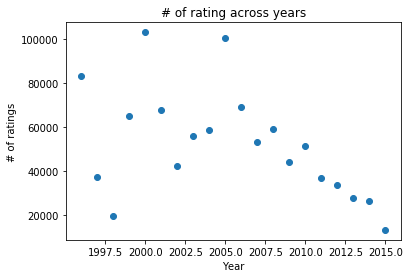

In [41]:
plt.scatter(years, num_ratings)
plt.title('# of rating across years')
plt.xlabel('Year')
plt.ylabel('# of ratings')
plt.show()

***figure 5.1: Scatter plot of ratings across year***

A scatter plot is a type of plot that shows the data as a collection of points. scatter() function of matplotlib helps us to create scatter plot in python.<br>
To give label to x-axis and y-axis we used label() function.<br>
show() function displays the figure.<br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br>

***lets plot a histogram of movie ratings to get an overall picture***

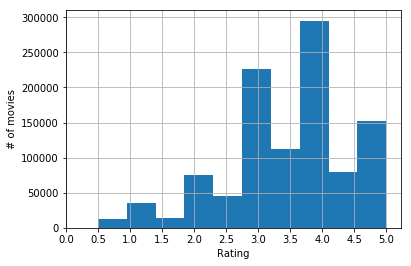

In [42]:
plt.hist(ratings_df.rating)
plt.xticks([0, 0.5, 1.0, 1.5, 2.0, 2.5, 3.0, 3.5, 4.0, 4.5, 5.0])
plt.xlabel('Rating')
plt.ylabel('# of movies')
plt.grid()
plt.show()

***figure 5.2: Histogram of number of ratings in ratings dataset***

The above histogram shows thats most common rating a user gives are 4.0 and 3.0

'matplotlib.pyplot' is a collection of command style functions that make matplotlib work like MATLAB. Each pyplot function makes some change to a figure: e.g., creates a figure, creates a plotting area in a figure, plots some lines in a plotting area, decorates the plot with labels, etc. 

To create above histogram we used hist() function of Matplotlib library which computes and draw histogram of x (in this case x is rating)<br>
xticks() function sets the current tick locations and labels of the x-axis.<br>
grid() function simply configure the grid lines.<br><br>

<br><br><br><br><br><br><br><br><br><br><br><br>***lets plot this genre distribution as a pie chart***

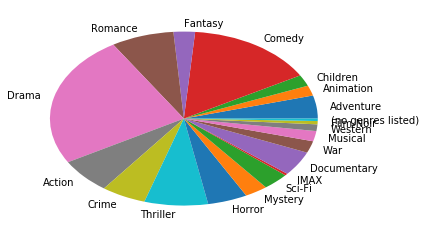

In [43]:
plt.pie(genre_dict.values(), labels=genre_dict.keys())
plt.savefig('./movie-genres-pie.png')
plt.show()

***figure 5.3: Pie chart of Genre Distribution***

To access data in a  dictionary, python provides us with two functions:<br>
    dict.keys() to access keys of dictionary and dict.values() to access associated keys

pie() function of MatPlotLib library plots a pie chart.<br>
savefig() function saves the current figure into our system<br><br>
<br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br>

***We now will create a Wordcloud of genres.***<br>
To do so we first creates a Function that control the color of the words

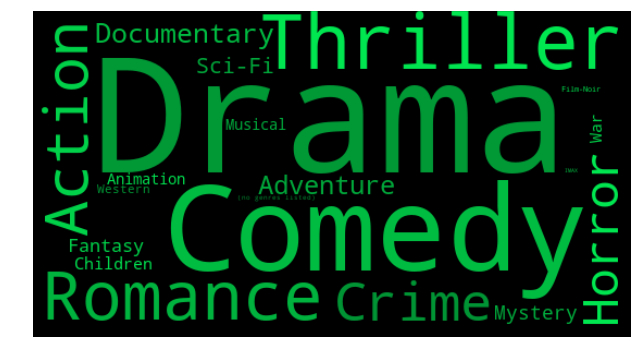

In [44]:
def random_color_func(word=None, font_size=None, position=None,
                      orientation=None, font_path=None, random_state=None):
    h = int(360.0 * tone / 255.0)
    s = int(100.0 * 255.0 / 255.0)
    l = int(100.0 * float(random_state.randint(70, 120)) / 255.0)
    return "hsl({}, {}%, {}%)".format(h, s, l)
tone = 100

f, ax = plt.subplots(figsize=(14, 6))

wordcloud = WordCloud(width=550,height=300, background_color='black', 
                      max_words=1628,relative_scaling=0.7,
                      color_func = random_color_func,
                      normalize_plurals=False)

wordcloud.generate_from_frequencies(genre_dict)
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.savefig('./wordcloud.png')
plt.show()


***figure 5.4: word cloud of Genre***

generate_from_frequencies() from the wordcloud library create as word cloud from words and frequencies., in this case from a dictionary.<br>imshow() displays an image on the axes.<br><br><br><br><br><br>

***Now we will plot a bar chart***

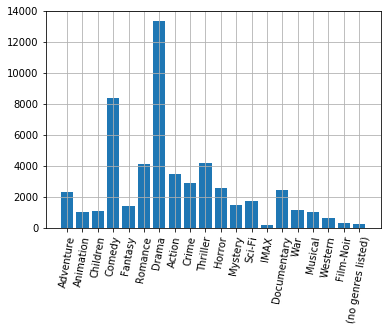

In [45]:
x = list(range(len(genre_dict)))
plt.xticks(x, genre_dict.keys(), rotation=80)
plt.bar(x, genre_dict.values())
plt.grid()
plt.show()

bar() function of Matplotlib library generated a bar plot.<br><br>

***From all the above visualisation we can see that most of the movies are Drama movies.***<br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br>

### 6. Predicition

***Prediction 1: We will predict how many ratings are generated in a certain year***

To predict this, we will first count total number of ratings given in each year, we have already did that in ratings_per_year above, so we will use the same.

In [46]:
ratings_per_year.head()

rating_year
1996     83414
1997     37483
1998     19648
1999     65152
2000    103110
Name: rating_year, dtype: int64

Now lets store these values in variables, so as to use them in prediction:

In [47]:
years = ratings_per_year.keys()
num_ratings = ratings_per_year.get_values()

<br><br>now lets try to build a linear regression model using which we will predict how many ratings we get each year:

In [48]:
from scipy import stats
slope, intercept, r_value, p_value, std_err = stats.linregress(years, num_ratings)
print ('Generated linear model is  y = ' + str(slope) + ' * x + ' + str(intercept))

Generated linear model is  y = -2030.37368421 * x + 4124343.17368


In [49]:
# now lets use the slope and intercept to create a predict function which will predict num_ratings given a year
def predict_num_ratings(year):
    return slope * year + intercept

predicted_ratings = predict_num_ratings(years)

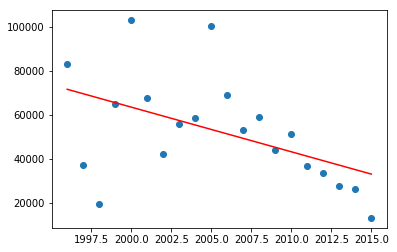

In [50]:
# now lets plot our predicted values along side the actual data to see how well we did
plt.scatter(years, num_ratings)
plt.plot(years, predicted_ratings, c='r')
plt.show()

In [51]:
# now lets see how good our prediction is by calculating the r-squared value
r_square = r_value ** 2
print ('Linear Model r_square value', r_square)

Linear Model r_square value 0.238855494138


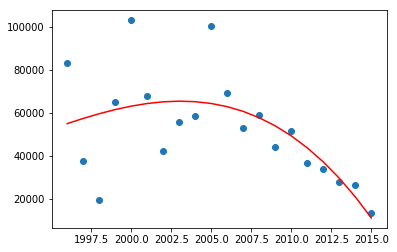

In [52]:
# now lets try a polynomial function instead of a linear function and see if that fits better
polynomial = np.poly1d(np.polyfit(years, num_ratings, 3))
plt.scatter(years, num_ratings)
plt.plot(years, polynomial(years), c='r')
plt.show()

In [53]:
# now lets calculate the r-square for this polynomial regression
from sklearn.metrics import r2_score
r2 = r2_score(num_ratings, polynomial(years))
print ('Polynomial Model r_square value', r2)

Polynomial Model r_square value 0.418534039494


In [54]:
# now we can predict how many ratings we expect in any year using our polynomial function
print(predict_num_ratings(2020))

22988.3315789


In [55]:
# now lets try a polynomial function to predict reviews in numbers
poly= np.poly1d(np.polyfit(num_ratings,years, 5))

In [56]:
# now we can predict how many ratings we expect in numbers using our polynomial function
print (poly(2030))              

2032.80511871


***Prediction 2: we will predict what average rating a movie can get in a particular year***

so lets count how many movies are given a particular ratings

In [57]:
ratings_count =(movie_df_ratings_df.groupby(['rating'])['rating'].count())
ratings_count

rating
0.5     13232
1.0     35144
1.5     14029
2.0     74706
2.5     44791
3.0    226202
3.5    112926
4.0    295135
4.5     79848
5.0    152562
Name: rating, dtype: int64

Now lets store these values in variables, so as to use them in prediction:

In [58]:
ratings = ratings_count.keys()
count = ratings_count.get_values()


<br><br>now lets scatter plot this data to visualize how ratings are spead across years

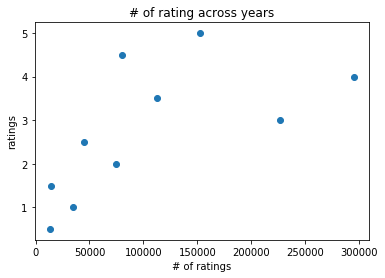

In [59]:
plt.scatter(count,ratings)
plt.title('# of rating across years')
plt.xlabel('# of ratings')
plt.ylabel('ratings')
plt.show()

<br><br>now lets try to build a linear regression model using which we will predict how many ratings we get each year

In [60]:
from scipy import stats
slope, intercept, r_value, p_value, std_err = stats.linregress(count,ratings)
print ('Generated linear model is  y = ' + str(slope) + ' * x + ' + str(intercept))

Generated linear model is  y = 1.02244847826e-05 * x + 1.67788608691


<br> now lets use the slope and intercept to create a predict function which will predict num_ratings given a year

In [61]:
def predict_rating(ratings):
    return slope * count + intercept

predicted_ratings = predict_rating(ratings)

now lets plot our predicted values along side the actual data to see how well we did

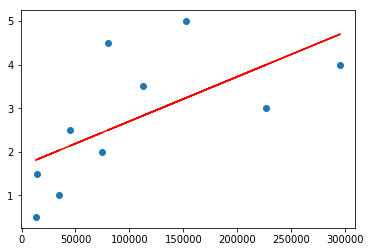

In [62]:
plt.scatter(count,ratings)
plt.plot(count, predicted_ratings, c='r')
plt.show()

<br><br>now lets try a polynomial function to predict reviews in numbers

In [63]:
poly1= np.poly1d(np.polyfit(count,ratings, 5))

now lets calculate the r-square for this polynomial regression

In [64]:
from sklearn.metrics import r2_score
r2 = r2_score(ratings, poly1(count))
print ('Polynomial Model r_square value', r2)

Polynomial Model r_square value 0.783515252469


In [65]:
#to show reviews in proper format * by 10
poly1= np.poly1d(np.polyfit(count,ratings, 5)*10)

<br>now we can predict how many ratings we expect in numbers using our polynomial function

In [66]:
print (poly1(2020))              

4.03837300108


<br><br><br><br>

## Conclusion:

Analysing the movieLens dataset gave many interesting insights into the movie business. Although it is mainly used for recommendation systems we were still able to extract some trends in the data. With web scraping methods the dataset could be easily entended to provide even more interesting observations. Overall, it was an interesting dataset to analyze that allowed using even more interesting python packages & features.